## Application Flow 
Decision Tree is one of the most fundamental algorithms for classification and regression in the Machine Learning world.

But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow.PNG" width= "300">

## Decision Tree

Decision tree algorithm is one of the most versatile algorithms in machine learning which can perform both classification and regression analysis. It is very powerful and works great with complex datasets. Apart from that, it is very easy to understand and read. That makes it more popular to use. When coupled with ensemble techniques – which we will learn very soon- it performs even better.
As the name suggests, this algorithm works by dividing the whole dataset into a tree-like structure based on some rules and conditions and then gives prediction based on those conditions.
Let’s understand the approach to decision tree with a basic scenario. 
Suppose it’s Friday night and you are not able to decide if you should go out or stay at home. Let the decision tree decide it for you.


<img src="Decision_tree1.PNG" width="300">
                         
Although we may or may not use the decision tree for such decisions, this was a basic example to help you understand how a decision tree makes a decision.
So how did it work?
*	It selects a root node based on a given condition, e.g. our root node was chosen as time >10 pm.
*	Then, the root node was split into child notes based on the given condition. The right child node in the above figure fulfilled the condition, so no more questions were asked.
*	The left child node didn’t fulfil the condition, so again it was split based on a new condition.
*	This process continues till all the conditions are met or if you have predefined the depth of your tree, e.g. the depth of our tree is 3, and it reached there when all the conditions were exhausted.

Let’s see how the parent nodes and condition is chosen for the splitting to work.

#### Decision Tree for Regression
When performing regression with a decision tree, we try to divide the given values of X into distinct and non-overlapping regions, e.g. for a set of possible values X1, X2,..., Xp; we will try to divide them into J distinct and non-overlapping regions R1, R2, . . . , RJ.
For a given observation falling into the region Rj, the prediction is equal to the mean of the response(y) values for each training observations(x) in the region Rj. 
The regions R1,R2, . . . , RJ  are selected in a way to reduce the following sum of squares of residuals :


<img src="formula1.PNG" width="300">
                                                        
Where, yrj (second term) is the mean of all the response variables in the region ‘j’.



#### Recursive binary splitting(Greedy approach)
As mentioned above, we try to divide the X values into j regions, but it is very expensive in terms of computational time to try to fit every set of X values into j regions. Thus, decision tree opts for a top-down greedy approach in which nodes are divided into two regions based on the given condition, i.e. not every node will be split but the ones which satisfy the condition are split into two branches. It is called greedy because it does the best split at a given step at that point of time rather than looking for splitting a step for a better tree in upcoming steps. It decides a threshold value(say s) to divide the observations into different regions(j) such that the RSS for Xj>= s and Xj <s is minimum.


<img src="formula2.PNG" width="400">
                      
Here for the above equation, j and s are found such that this equation has the minimum value.
The regions R1, R2 are selected based on that value of s and j such that the equation above has the minimum value.
Similarly, more regions are split out of the regions created above based on some condition with the same logic. This continues until a stopping criterion (predefined) is achieved.
Once all the regions are split, the prediction is made based on the mean of observations in that region.

The process mentioned above has a high chance of overfitting the training data as it will be very complex. 

#### Tree Pruning
Tree pruning is the method of trimming down a full tree (obtained through the above process) to reduce the complexity and variance in the data. Just as we regularised linear regression, we can also regularise the decision tree model by adding a new term. 


<img src="formula3.PNG" width="300">
                                       
Where, T  is the subtree which is a subset of the full tree T0
And α is the non-negative tuning parameter which penalises the MSE with an increase in tree length.
By using cross-validation, such values of α and T are selected for which our model gives the lowest test error rate.
This is how the decision tree regression model works. Let’s now see the working algorithm of doing classification using a decision tree.
Greedy Algorithm
As per Hands-on machine learning book “greedy algorithm greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.”


#### Post-pruning

Post-pruning, also known as backward pruning, is the process where the decision tree is generated first and then the non-significant branches are removed. Cross-validation set of data is used to check the effect of pruning and tests whether expanding a node will make an improvement or not. If any improvement is there then we continue by expanding that node else if there is reduction in accuracy then the node not be expanded and should be converted in a leaf node.


#### Pre-pruning

Pre-pruning, also known as forward pruning, stops the non-significant branches from generating. It uses a condition to decide when should it terminate splitting of some of the branches prematurely as the tree is generated. 


### Classification Trees

Regression trees are used for quantitative data. In the case of qualitative data or categorical data, we use classification trees.  In regression trees, we split the nodes based on RSS criteria, but in classification, it is done using classification error rate, Gini impurity and entropy.
Let’s understand these terms in detail.

#### Entropy
Entropy is the measure of randomness in the data. In other words, it gives the impurity present in the dataset.

<img src="entropy.PNG" width="300">
                                           
When we split our nodes into two regions and put different observations in both the regions, the main goal is to reduce the entropy i.e. reduce the randomness in the region and divide our data cleanly than it was in the previous node. If splitting the node doesn’t lead into entropy reduction, we try to split based on a different condition, or we stop. 
A region is clean (low entropy) when it contains data with the same labels and random if there is a mixture of labels present (high entropy).
Let’s suppose there are ‘m’ observations and we need to classify them into categories 1 and 2.
Let’s say that category 1 has ‘n’ observations and category 2 has ‘m-n’ observations.

p= n/m  and    q = m-n/m = 1-p

then, entropy for the given set is:


          E = -p*log2(p) – q*log2(q) 
           
           
When all the observations belong to category 1, then p = 1 and all observations belong to category 2, then p =0, int both cases E =0, as there is no randomness in the categories.
If half of the observations are in category 1 and another half in category 2, then p =1/2 and q =1/2, and the entropy is maximum, E =1.


<img src="entropy1.PNG" width="300">
                                  

#### Information Gain
Information gain calculates the decrease in entropy after splitting a node. It is the difference between entropies before and after the split. The more the information gain, the more entropy is removed. 

<img src="info_gain.PNG" width="300">

                                 
Where, T is the parent node before split and X is the split node from T.

A tree which is splitted on basis of entropy and information gain value looks like:

<img src="entropy_tree.PNG" width="900">

#### Ginni Impurity
According to wikipedia, ‘Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labelled if it was randomly labelled according to the distribution of labels in the subset.’
It is calculated by multiplying the probability that a given observation is classified into the correct class and sum of all the probabilities when that particular observation is classified into the wrong class.
Let’s suppose there are k number of classes and an observation belongs to the class ‘i’, then Ginni impurity is given as:

<img src="ginni.PNG" width="300">
                                    
Ginni impurity value lies between 0 and 1, 0 being no impurity and 1 denoting random distribution.
The node for which the Ginni impurity is least is selected as the root node to split.


A tree which is splitted on basis of ginni impurity value looks like:

<img src="tree_example.PNG" width="900">




### Maths behind Decision Tree Classifier
Before we see the python implementation of decision tree. let's first understand the math behind the decision tree classfication. We will see how all the above mentioned terms are used for splitting.

We will use a simple dataset which contains information about students of different classes and gender and see whether they stay in school's hostel or not.

This is how our data set looks like :


<img src='data_class.PNG' width="200">

Let's try and understand how the root node is selected by calcualting gini impurity. We will use the above mentioned data.

We have two features which we can use for nodes: "Class" and "Gender".
We will calculate gini impurity for each of the features and then select that feature which has least gini impurity.

Let's review the formula for calculating ginni impurity:

<img src='example/gini.PNG' width="200">

Let's start with class, we will try to gini impurity for all different values in "class". 

<img src='example/1.PNG' width="500">

<img src='example/2.PNG' width="500">

<img src='example/3.1.PNG' width="500">

<img src='example/3.PNG' width="500">

<img src='example/4.PNG' width="500">

<img src='example/5.PNG' width="500">

<img src='example/6.PNG' width="500">

<img src='example/7.PNG' width="500">

<img src='example/8.PNG' width="500">

This is how our Decision tree node is selected by calculating gini impurity for each node individually.
If the number of feautures increases, then we just need to repeat the same steps after the selection of the root node.

We will try and find the root nodes for the same dataset by calculating entropy and information gain.

DataSet:

<img src='data_class.PNG' width="200">

We have two features and we will try to choose the root node by calculating the information gain by splitting each feature.

Let' review the formula for entropy and information gain:

<img src='example/formula_entropy.PNG' width="300">

<img src='example/inform_gain.PNG' width="300">


Let's start with feature "class" :

<img src='example/9.PNG' width="500">

<img src='example/10.1.PNG' width="500">

<img src='example/11.PNG' width="500">

<img src='example/12.PNG' width="500">

<img src='example/13.PNG' width="500">


Let' see the information gain from feature "gender" :

<img src='example/10.2.PNG' width="500">

<img src='example/14.PNG' width="500">

<img src='example/15.PNG' width="500">

<img src='example/16.PNG' width="500">






### Different Algorithms for Decision Tree


* ID3 (Iterative Dichotomiser) : It is one of the algorithms used to construct decision tree for classification. It uses Information gain as the criteria for finding the root nodes and splitting them. It only accepts categorical attributes.

* C4.5 : It is an extension of ID3 algorithm, and better than ID3 as it deals both continuous and discreet values.It is also used for classfication purposes.


* Classfication and Regression Algorithm(CART) : It is the most popular algorithm used for constructing decison trees. It uses ginni impurity as the default calculation for selecting root nodes, however one can use "entropy" for criteria as well. This algorithm works on both regression as well as classfication problems. We will use this algorithm in our pyhton implementation. 


Entropy and Ginni impurity can be used reversibly. It doesn't affects the result much. Although, ginni is easier to compute than entropy, since entropy has a log term calculation. That's why CART algorithm uses ginni as the default algorithm.

If we plot ginni vs entropy graph, we can see there is not much difference between them:

<img src="example/entropyVsGini.PNG" width = "400">



##### Advantages of Decision Tree:

   * It can be used for both Regression and Classification problems.
   * Decision Trees are very easy to grasp as the rules of splitting is clearly mentioned.
   * Complex decision tree models are very simple when visualized. It can be understood just by visualising.
   * Scaling and normalization are not needed.


##### Disadvantages of Decision Tree:


   * A small change in data can cause instability in the model because of the greedy approach.
   * Probability of overfitting is very high for Decision Trees.
   * It takes more time to train a decision tree model than other classification algorithms.

# Cross-Validation

Suppose you train a model on a given dataset using any specific algorithm. You tried to find the accuracy of the trained model using the same training data and found the accuracy to be 95% or maybe even 100%. What does this mean? Is your model ready for prediction? The answer is no.
Why? Because your model has trained itself on the given data, i.e. it knows the data and it has generalized over it very well. But when you try and predict over a new set of data, it’s most likely to give you very bad accuracy, because it has never seen the data before and thus it fails to generalizes well over it. This is the problem of overfitting. 
To tackle such problem, Cross-validation comes into the picture. Cross-validation is a resampling technique with a basic idea of dividing the training dataset into two parts i.e. train and test. On one part(train) you try to train the model and on the second part(test) i.e. the data which is unseen for the model, you make the prediction and check how well your model works on it. If the model works with good accuracy on your test data, it means that the model has not overfitted the training data and can be trusted with the prediction, whereas if it performs with bad accuracy then our model is not to be trusted and we need to tweak our algorithm.


Let’s see the different approaches of Cross-Validation:

*	Hold Out Method: 

It is the most basic of the CV techniques. It simply divides the dataset into two sets of training and test. The training dataset is used to train the model and then test data is fitted in the trained model to make predictions. We check the accuracy and assess our model on that basis. This method is used as it is computationally less costly. But the evaluation based on the Hold-out set can have a high variance because it depends heavily on which data points end up in the training set and which in test data. The evaluation will be different every time this division changes.

*	k-fold Cross-Validation

<img src="cv1.png" width=""> 

 img_src:Wikipedia

To tackle the high variance of Hold-out method, the k-fold method is used. The idea is simple, divide the whole dataset into ‘k’ sets preferably of equal sizes. Then the first set is selected as the test set and the rest ‘k-1’ sets are used to train the data. Error is calculated for this particular dataset.
Then the steps are repeated, i.e. the second set is selected as the test data, and the remaining ‘k-1’ sets are used as the training data. Again, the error is calculated. Similarly, the process continues for ‘k’ times. In the end, the CV error is given as the mean of the total errors calculated individually, mathematically given as:

<img src="cv2.png" width=""> 
                                               
The variance in error decreases with the increase in ‘k’. The disadvantage of k-fold cv is that it is computationally expensive as the algorithm runs from scratch for ‘k’ times.

*  Leave One Out Cross Validation (LOOCV)

<img src="cv3.png" width=""> 
 
LOOCV is a special case of k-fold CV, where k becomes equal to n (number of observations). So instead of creating two subsets, it selects a single observation as a test data and rest of data as the training data. The error is calculated for this test observations. Now, the second observation is selected as test data, and the rest of the data is used as the training set. Again, the error is calculated for this particular test observation. This process continues ‘n’ times and in the end, CV error is calculated as:

<img src="cv4.png" width=""> 
                                             

### Bias Variance tradeoff for k-fold CV, LOOCV and Holdout Set CV

There is a very good explanation given in the ISLR Book as given below:


A k-fold CV with k < n has a computational advantage to LOOCV. But putting computational issues aside,
a less obvious but potentially more important advantage of k-fold CV is that it often gives more accurate estimates of the test error rate than does LOOCV.
The validation set approach can lead to overestimates of the test error rate since in this approach the
the training set used to fit the statistical learning method contains only half the observations of the entire data set. Using this logic, it is not hard to see that LOOCV will give approximately unbiased estimates of the test error since each training set contains n − 1 observations, which is almost as many as the number of observations in the full data set. And performing k-fold CV for, say, k = 5 or k = 10 will lead to an intermediate level of bias since each training set contains (k − 1)n/k observations—fewer than
in the LOOCV approach, but substantially more than in the validation set approach. Therefore, from the perspective of bias reduction, it is clear that LOOCV is to be preferred to k-fold CV. However, we know that bias is not the only source for concern in an estimating procedure; we must also consider the procedure’s variance. It turns out that LOOCV has higher variance than does k-fold CV with k < n. Why
is this the case? When we perform LOOCV, we are in effect averaging the outputs of n fitted models, each of which is trained on an almost identical set of observations; therefore, these outputs are highly (positively) correlated with each other. In contrast, when we perform k-fold CV with k < n, we are averaging the outputs of k fitted models that are somewhat less correlated with each other since the overlap between the training sets in each model is smaller. Since the mean of many highly correlated quantities has higher variance than does the mean of many quantities that are not as highly correlated, the test error estimate resulting from LOOCV tends to have higher variance than does the test error estimate resulting from k-fold CV.
















### Implementation in Python

we will use Sklearn module to implement decision tree algorithm. 
Sklearn uses CART (classification and Regression trees) algorithm and by default it uses Gini impurity as a criteria to split the nodes.

There are other algorithms like ID3, C4.5, Chi-square etc. 

We will see the use of CART in following implementation.

In [4]:
import pandas as pd
#import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

In [5]:
data = pd.read_csv("winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The data set consists following Input variables :
1 - fixed acidity  2 - volatile acidity  3 - citric acid  4 - residual sugar  5 - chlorides  6 - free sulfur dioxide

7 - total sulfur dioxide  8 - density  9 - pH   10 - sulphates   11 - alcohol

and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see there is no missing data in the columns. Great!!

In [7]:
X = data.drop(columns = 'quality')
y = data['quality']


In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [9]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [11]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

Let's understand the above tree:


<img src="tree_explain.PNG" width="300">

* the first value indicates the column and the condition on which the root node was selected and further will be splitted
* the second value gives the gini impurity of the selected node
* samples gives the number of observations at that point of time present in the node
* value within the square brackets represents number of observations present in each class(output) i.e. in the above given figure, 8 observations are in class 1, 38 in class 2 , 468 in class 3 and so on.

Then  the split was made on the basis of given condition.


In [12]:
clf.score(x_train,y_train)

1.0

In [13]:
py_pred = clf.predict(x_test)

In [14]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6375

Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

### What are hyper parameters?
<img src="hypr_params.PNG" width="700">


We can see above the decision tree classifier algorithm takes all those parameters which are also known as hyperparameters.

Let's see the most important ones of the parameters(as per sklearn documentation) :
#### Parameters
  ----------
 * criterion : string, optional (default="gini")
       The function to measure the quality of a split. Supported criteria are
       "gini" for the Gini impurity and "entropy" for the information gain.
   
 *  splitter : string, optional (default="best")
       The strategy used to choose the split at each node. Supported
       strategies are "best" to choose the best split and "random" to choose
       the best random split.
   
 *  max_depth : int or None, optional (default=None)
       The maximum depth of the tree. If None, then nodes are expanded until
       all leaves are pure or until all leaves contain less than
       min_samples_split samples.
   
 *  min_samples_split : int, float, optional (default=2)
       The minimum number of samples required to split an internal node:
   
       - If int, then consider `min_samples_split` as the minimum number.
       - If float, then `min_samples_split` is a fraction and
         `ceil(min_samples_split * n_samples)` are the minimum
         number of samples for each split.
   
       .. versionchanged:: 0.18
          Added float values for fractions.
   
 *  min_samples_leaf : int, float, optional (default=1)
       The minimum number of samples required to be at a leaf node.
       A split point at any depth will only be considered if it leaves at
       least ``min_samples_leaf`` training samples in each of the left and
       right branches.  This may have the effect of smoothing the model,
       especially in regression.
   
       - If int, then consider `min_samples_leaf` as the minimum number.
       - If float, then `min_samples_leaf` is a fraction and
         `ceil(min_samples_leaf * n_samples)` are the minimum
         number of samples for each node.
   
 *  max_features : int, float, string or None, optional (default=None)
       The number of features to consider when looking for the best split:
   
           - If int, then consider `max_features` features at each split.
           - If float, then `max_features` is a fraction and
             `int(max_features * n_features)` features are considered at each
             split.
           - If "auto", then `max_features=sqrt(n_features)`.
           - If "sqrt", then `max_features=sqrt(n_features)`.
           - If "log2", then `max_features=log2(n_features)`.
           - If None, then `max_features=n_features`.
   
       Note: the search for a split does not stop until at least one
       valid partition of the node samples is found, even if it requires to
       effectively inspect more than ``max_features`` features.
   
 *  random_state : int, RandomState instance or None, optional (default=None)
       If int, random_state is the seed used by the random number generator;
       If RandomState instance, random_state is the random number generator;
       If None, the random number generator is the RandomState instance used
       by `np.random`.
   
 *  max_leaf_nodes : int or None, optional (default=None)
       Grow a tree with ``max_leaf_nodes`` in best-first fashion.
       Best nodes are defined as relative reduction in impurity.
       If None then unlimited number of leaf nodes.
   
 *  min_impurity_decrease : float, optional (default=0.)
       A node will be split if this split induces a decrease of the impurity
       greater than or equal to this value.
   
 *  min_impurity_split : float, (default=1e-7)
       Threshold for early stopping in tree growth. A node will split
       if its impurity is above the threshold, otherwise it is a leaf.
       
 *  class_weight : dict, list of dicts, "balanced" or None, default=None
       Weights associated with classes in the form ``{class_label: weight}``.
       If not given, all classes are supposed to have weight one. For
       multi-output problems, a list of dicts can be provided in the same
       order as the columns of y.
   
 * presort : bool, optional (default=False)
       Whether to presort the data to speed up the finding of best splits in
       fitting. For the default settings of a decision tree on large
       datasets, setting this to true may slow down the training process.
       When using either a smaller dataset or a restricted depth, this may
       speed up the training.
   

When we do hyperparameter tuning, we basically try to find those sets and values of hyperparameters which will give us a model with maximum accuracy.
Let's go ahead and try to improve our model.

We will start with scaling our data.

In [15]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.

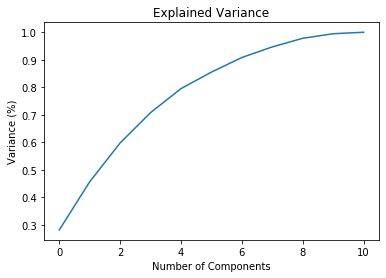

In [160]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 8 components.
So instead of giving all 11 columns as input in our algorithm let's use these 8 principal components instead.

In [170]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [171]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876


In [246]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.58125

There is a little increase in our test accuracy. Great!!

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
We have studied about CrossValidation in upcoming lecture. 

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

In [17]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [18]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [19]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [20]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [21]:
grid_search.best_score_

0.6130245035233824

In [22]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [23]:
clf.score(x_test,y_test)

0.5770833333333333

Great!! Our test score has improved after using Gridsearch.

Note : we must understand that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.

 Let's visualize the tree:


In [24]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [25]:
# let's save the model
import pickle

with open('C://Users//user/iNeuron/Decision tree'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('C://Users//user/iNeuron/Decision tree'+ '/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('C://Users//user/iNeuron/Decision tree'+ '/pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)

FileNotFoundError: [Errno 2] No such file or directory: 'C://Users//user/iNeuron/Decision tree/modelForPrediction.sav'

## Cloud  Deployment (Heroku)

Once the training is completed, we need to expose the trained model as an API for the user to consume it. For prediction, the saved model is loaded first and then the predictions are made using it. If the web app works fine, the same app is deployed to the cloud platform. The application flow for cloud deployment looks like:

<img src="testing_pipeline.PNG" width= "300">


### Pre-requisites for cloud deployment:
* Basic knowledge of flask framework.
* Any Python IDE installed(we are using PyCharm).
* A Heroku account.
* Basic understanding of HTML.


### Steps before cloud deployment:

We need to change our code a bit so that it works unhindered on the cloud, as well.

* Add a file called ‘gitignore’ inside the project folder. This folder contains the list of the files which we don’t want to include in the git repository. My gitignore file looks like:

     **.idea**

As I am using PyCharm as an IDE, and it’s provided by the Intellij Idea community, it automatically adds the .idea folder containing some metadata. We need not include them in our cloud app.

* Add a file called ‘Procfile’ inside the ‘reviewScrapper’ folder. This folder contains the command to run the flask application once deployed on the server:

     **web: gunicorn app:app**

Here, the keyword ‘web’ specifies that the application is a web application. And the part ‘app:app’ instructs the program to look for a flask application called ‘app’ inside the ‘app.py’ file. Gunicorn is a Web Server Gateway Interface (WSGI) HTTP server for Python.

* Open a command prompt window and navigate to your ‘reviewScrapper’ folder. Enter the command ‘pip freeze > requirements.txt’. This command generates the ‘requirements.txt’ file

The requirements.txt helps the Heroku cloud app to install all the dependencies before starting the webserver.



After performing all the above steps the project structure will look like:

#<img src="Decision_tree-deploy.PNG" width="300">

### Deployment to Heroku:

* After installing the Heroku CLI, Open a command prompt window and navigate to your project folder.
* Type the command **heroku login** to login to your heroku account.
* After logging in to Heroku, enter the command **heroku create** to create a heroku app. It will give you the URL of your Heroku app after successful creation. Or alternatively, you can go to the heroku website and create an app directly.
* Before deploying the code to the Heroku cloud, we need to commit the changes to the git repository.
* Type the command **git init** to initialize a local git repository.
* Enter the command **git status** to see the uncommitted changes.
* Enter the command **git add .** to add the uncommitted changes to the local repository.
* Enter the command **git commit -am "make it better"** to commit the changes to the local repository.
* Enter the command **git push heroku master** to push the code to the heroku cloud.
* After deployment, heroku gives you the URL to hit the web API.
* Once your application is deployed successfully, enter the command **heroku logs --tail** to see the logs.



All the code is available in iNeuron git repo.